May 5: Constructing IDEALIZED, the bathymetry of an idealized canyon with the dimensions of Mackenzie canyon that will be used to test NEMO's performance at these scales.

The shape of the continental shelf containing the canyon is defined as

(Klinck, 1996; Kampf, 2007)
$$H(x,y) = H_D - \frac{1}{2} \big(H_D - H_S \big) \Bigg[ 1 - tanh \Big( \frac{y-y_0(x)}{y_c} \Big) \Bigg]$$
(Klinck, 1996)
$$y_0(x) = y_n + y_b \Bigg[ 1-e^{\frac{-(x^2 - x_0^2)}{2b^2}} \Bigg]$$
(Kampf, 2007)
$$y_0(x) = y_n + y_b \Bigg[ 1-\kappa e^{\frac{-(x - x_0)^2}{2b^2}} \Bigg]$$ 

* $H_D$ = maximum depth in domain
* $H_S$ = shelf depth
* $y_c$ = steepness of the continental slope
* $y_n$ = distance between head and coast
* $y_b$ = distance between head and shelf break
* $x_0$ = location of axis
* $b$ = canyon width

(She and Klinck, 2000)
$$H_s(y) = H_c - \big(H_{sb}-H_c\big) min\big(\frac{y}{y_{sb}},1\big) + \frac{1}{2} \big(H_{oc} - H_{sb} \big) \Bigg[ 1 + tanh \Big( \frac{y-y_{sl}(x)}{L_{sl}} \Big) \Bigg]$$

$$H(x,y) = H_s(y) + H_{can}(y) e^{\frac{-(x - x_c)^2}{2W(y)^2}} $$ 
$$W(y) = W_c(0.5 + \frac{y}{L_y})$$
$$H_{can}(y) = max(0., -H_s(y)+d_{can} \sqrt{\frac{y-y_c}{y_{sb}-y_c}})$$

* $H_c$ = depth of coastal wall
* $H_{sb}$ = depth at shelf break
* $H_{oc}$ = maximum depth
* $y_{sl}$ = location of middle of slope
* $L_{sl}$ = half-width of slope
* $y_{sb}$ = offshore distance of shelf break
* $y_c$ location of the head
* $x_c$ = location of canyon axis

(Jordi et al, 2008)
$$H_S= 
\begin{cases}
    H_1-H_1\big(\frac{y-y_1}{y_1}\big)^3 & y\leq y_1\\
    H_1+\frac{1}{2}(H_2-H_1)\big[ 1+tanh\big(\frac{y-y_2}{L_1}\big) \big] & y> y_1
\end{cases}$$

$$H_C = H_S + max\big(0, H_3 \sqrt{\frac{y-y_3}{y_1-y_3}}-H_S\big)e^{\Big[-\Big(\frac{x-x_3}{L_2+\frac{\sqrt{y}}{L_3}}\Big)^2\Big]}$$

* $y_1$ = shelf position
* $y_2$ = slope position
* $y_3$ = canyon position
* $H_1$ = shelf depth
* $H_2$ = open ocean depth
* $H_3$ = canyon depth at mouth
* $L_1$ = slope width
* $L_2$ = canyon length
* $L_3$ = canyon width
* $x_3$ = alongshore canyon position

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
HD = 900/1000
HS = 80/1000
yc_e = 0.033932095822522088
yc_w = 0.015763602988544421
yn = 53688.918782184468/1000
yb = 86443.62324659928/1000
b = 55339.859052946638/1000
x0 = 155

In [26]:
x = np.arange(0, 310, dtype=np.float)
y = np.arange(0, 310, dtype=np.float)
y0 = np.zeros((len(y),len(x)))
H = np.zeros((len(y),len(x)))
yc = yc_w

In [4]:
def plot_canyon(x, y, H):
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(1, 2, 1)
    p = ax1.pcolormesh(x,y,H, cmap=cm.Spectral)
    fig.colorbar(p, ax=ax1)
    ax1.set_xlabel('Alongshore Distance')
    ax1.set_ylabel('Cross-shore Distance')

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    X, Y = np.meshgrid(x, y)
    #ax2.plot_surface(X, Y, -1*H, cmap=cm.Spectral, linewidth=0, rstride=1, cstride=1, antialiased=False)
    ax2.plot_wireframe(X, Y, H, rstride=10, cstride=10)
    ax2.view_init(elev=30, azim=40)
    ax2.set_xlabel('Alongshore Distance')
    ax2.set_ylabel('Cross-shore Distance')
    ax2.set_zlabel('Depth')
    
    fig.subplots_adjust(wspace=0.01, hspace=None)

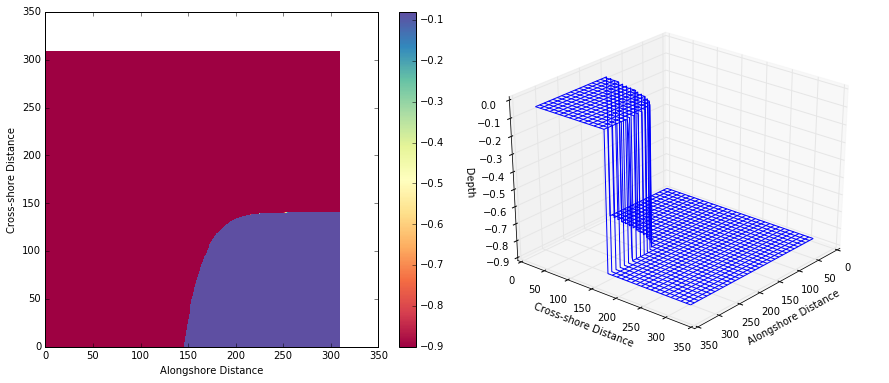

In [5]:
for j in range(len(y)):
    for i in range(len(x)):
        y0[j,i] = yn+(yb*(1-np.exp((-1*(x[i]**2-x0**2))/(2*(b**2)))))
        H[j,i] = HD-0.5*(HD-HS)*(1-np.tanh((y[j]-y0[j,i])/yc))

plot_canyon(x, y, -1*H)

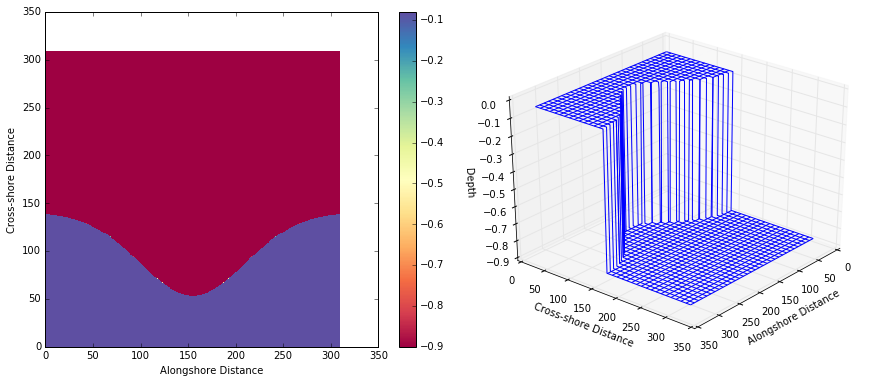

In [6]:
for j in range(len(y)):
    for i in range(len(x)):
        y0[j,i] = yn+(yb*(1-np.exp((-1*(x[i]-x0)**2)/(2*(b**2)))))
        H[j,i] = HD-0.5*(HD-HS)*(1-np.tanh((y[j]-y0[j,i])/yc))

plot_canyon(x, y, -1*H)

**Notes**: Tried HD as 900 and 403.27197266, but it doesn't make a difference for the continental slope. yc is too small.

In [8]:
y1 = 20
y2 = 150
y3 = 50
H1 = HS
H2 = HD
H3 = 403.27197266/1000
L1 = 52737.557774322464/1000
L2 = yb
L3 = b
x3 = x0

In [24]:
HSa = H1 - (H1 * ((y - y1)/y1)**3)
HSb = H1 + (0.5 * (H2 - H1)) * (1 + np.tanh((y - y2)/L1))
HS = HSb
HC = HS + (max((H3 * (np.sqrt((y - y3)/(y1 - y3)))) - HS)) * np.exp(-1 * ((x - x3)/(L2 + (np.sqrt(y)/L3)))**2)